In [1]:
#Importing the required packages.
from hana_ml import dataframe as hdf
import pandas as pd

ModuleNotFoundError: No module named 'shapely'


In [2]:
#Establishing a connection to SAP HANA database
myconn=hdf.ConnectionContext(userkey='DevChallenger')
print("SAP HANA DB version: ", myconn.hana_version())

SAP HANA DB version:  4.00.000.00.1679990881 (fa/CE2023.4)


In [3]:
print(myconn.sql("SELECT NOW() FROM DUMMY").collect().CURRENT_TIMESTAMP[0])

2023-03-31 05:13:59.723000


In [4]:
#Getting a list of tables present in the SAP HANA database.
myconn.get_tables()

,TABLE_NAME
0,BIKES
1,SEASONS
2,MONTHS


In [6]:
# Select specific columns from the 'BIKES' table and perform operations on them
bikes_hdf=myconn.table('BIKES').select(('"days_since_2011"', "Days_Counter"),
                                        ('add_days(\'2011-01-01\',"days_since_2011")', "CalDay"),
                                        ('"yr"', "Year"),
                                        ('"season"', "Season"),
                                        ('"mnth"', "Month"),
                                        ('"weekday"', "Weekday"),
                                        ('"workingday"', "Is_WorkingDay"),
                                        ('"holiday"', "Is_Holiday"),
                                        ('"weathersit"', "Weather"),
                                        ('"temp"', "Temperature"),
                                        ('"hum"', "Humidity"),
                                        ('"windspeed"', "Wind_Speed"),
                                        ('"cnt"', "Bikes_Rented")
                                       )

In [27]:
bikes_hdf.select?
#print(help(bikes_hdf.select))
#print(bikes_hdf.select.__doc__)
#def my_function():
   # print(bikes_hdf.select.__doc__)

#my_function()


In [18]:
bikes_hdf.head(5).collect().set_index('Days_Counter')

,CalDay,Year,Season,Month,Weekday,Is_WorkingDay,Is_Holiday,Weather,Temperature,Humidity,Wind_Speed,Bikes_Rented
Days_Counter,,,,,,,,,,,,
0,2011-01-01,2011,WINTER,JAN,SAT,NO WORKING DAY,NO HOLIDAY,MISTY,8.175849,80.5833,10.749882,985
1,2011-01-02,2011,WINTER,JAN,SUN,NO WORKING DAY,NO HOLIDAY,MISTY,9.083466,69.6087,16.652113,801
2,2011-01-03,2011,WINTER,JAN,MON,WORKING DAY,NO HOLIDAY,GOOD,1.229108,43.7273,16.636703,1349
3,2011-01-04,2011,WINTER,JAN,TUE,WORKING DAY,NO HOLIDAY,GOOD,1.400000,59.0435,10.739832,1562
4,2011-01-05,2011,WINTER,JAN,WED,WORKING DAY,NO HOLIDAY,GOOD,2.666979,43.6957,12.522300,1600


In [19]:
bikes_hdf.count()

731

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity.default_value

'last_expr'

In [22]:
from matplotlib import pyplot as plt

In [23]:
%matplotlib inline

In [24]:
plt.show?

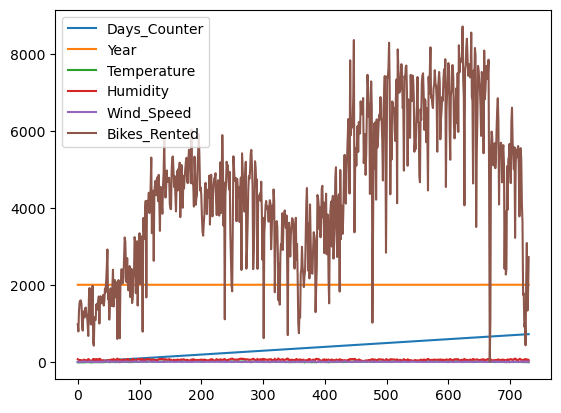

In [28]:
bikes_hdf.collect().plot()
plt.show()

In [29]:
prop_cycle_default = plt.rcParams['axes.prop_cycle']

In [30]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors_df = pd.Series(data=[1]*len(colors), index=colors)
display(colors_df)

#1f77b4    1
#ff7f0e    1
#2ca02c    1
#d62728    1
#9467bd    1
#8c564b    1
#e377c2    1
#7f7f7f    1
#bcbd22    1
#17becf    1
dtype: int64

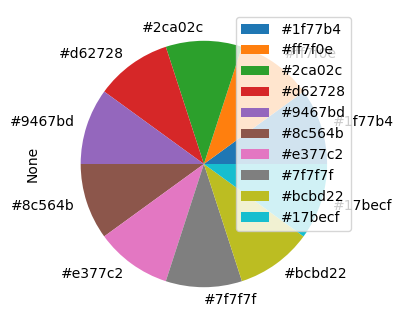

In [32]:
colors_df.plot(kind='pie', legend=True, figsize=(4,4))
plt.show()

In [33]:
from cycler import cycler 
sap_fiori_belize_cycler = cycler(color=['#0092D1', '#E09D00', '#1A9898', '#E6600D', '#925ACE', '#759421', '#678BC7', '#C14646', '#647987', '#AB218E'])

plt.rc('axes', prop_cycle=sap_fiori_belize_cycler)

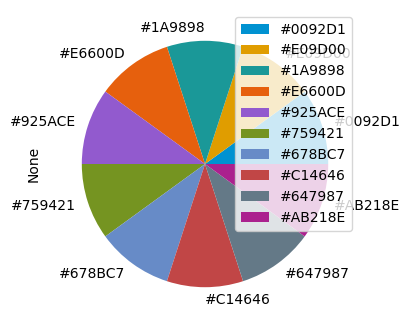

In [34]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors_df = pd.Series(data=[1]*len(colors), index=colors)

colors_df.plot(kind='pie', legend=True, figsize=(4,4))
plt.show()

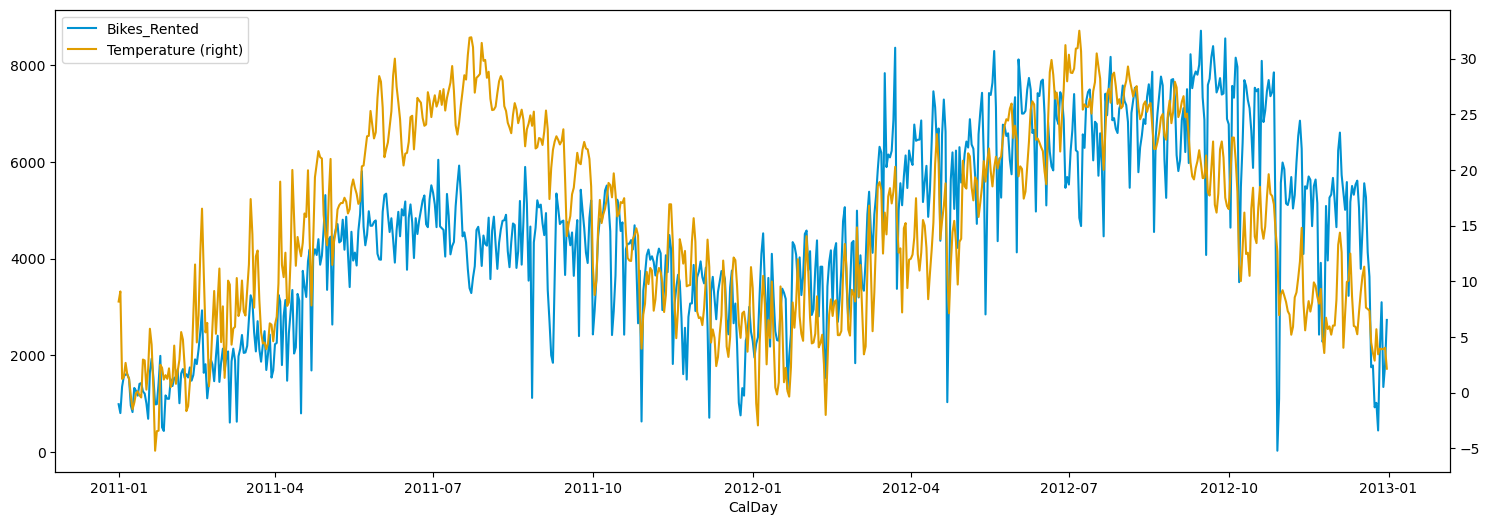

In [35]:
(bikes_hdf
 .select('CalDay', 'Bikes_Rented', 'Temperature').collect()
 .plot(x='CalDay', secondary_y=['Temperature'], figsize=(18, 6))
)
plt.show()


In [36]:
figsize_default=plt.rcParams["figure.figsize"]
print("Previous default figure size was : ", figsize_default)
plt.rcParams["figure.figsize"] = (18, 6)
print("Current default figure size is   : ", plt.rcParams["figure.figsize"])

Previous default figure size was :  [6.4, 4.8]
Current default figure size is   :  [18.0, 6.0]


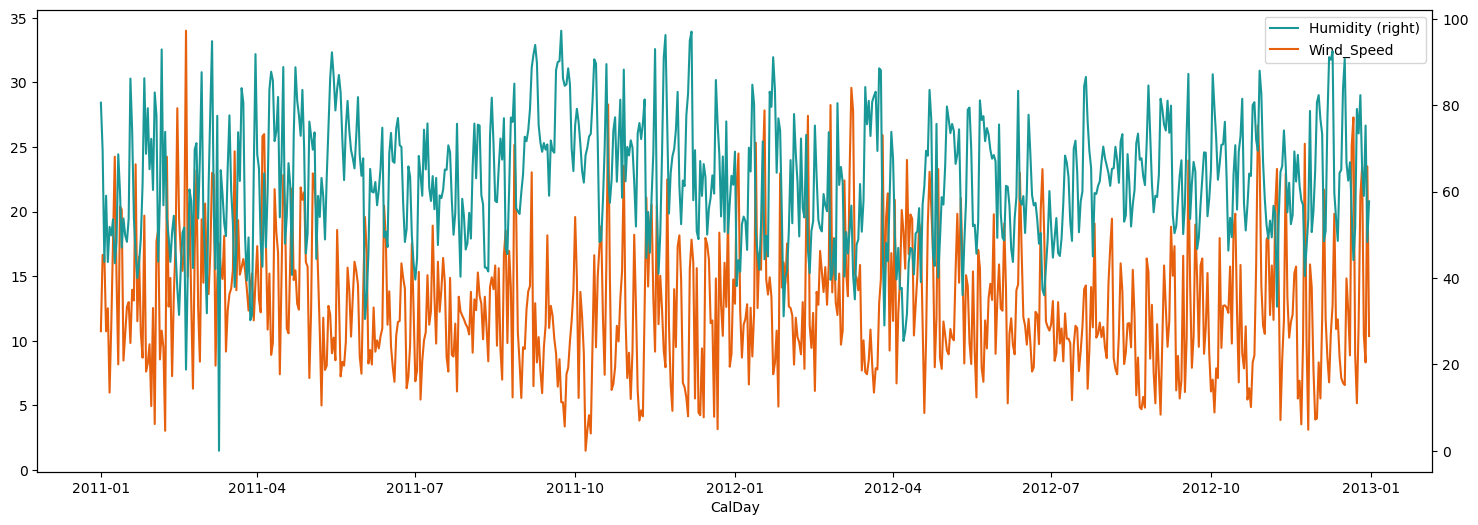

In [37]:
(bikes_hdf
 .select('CalDay', 'Humidity', 'Wind_Speed').collect()
 .plot(x='CalDay', secondary_y=['Humidity'], color=('C2','C3'))
)
plt.show()

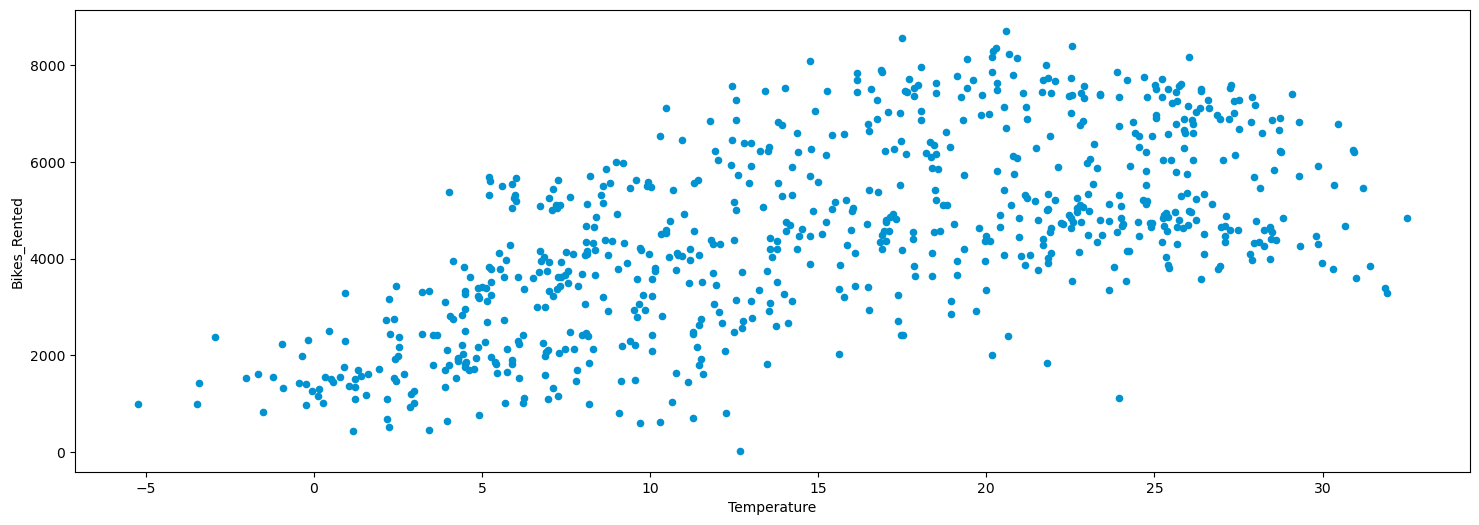

In [38]:
(bikes_hdf
 .select('Bikes_Rented', 'Humidity', 'Temperature').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature')
)
plt.show()

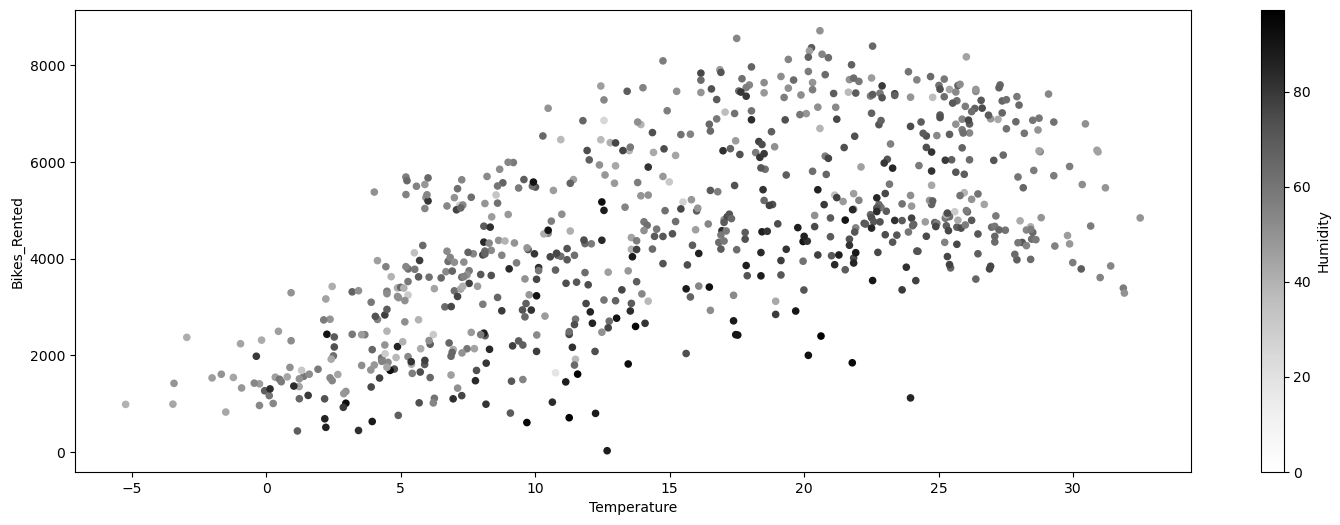

In [39]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Humidity').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Humidity')
)
plt.show()

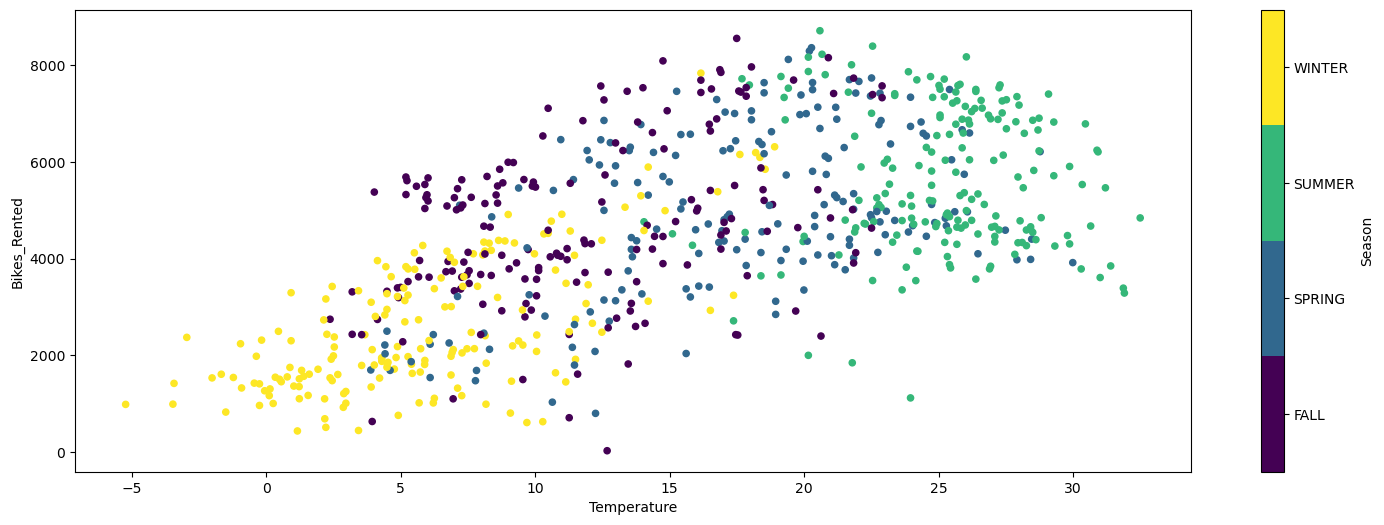

In [40]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Season').collect().astype({"Season": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Season', 
               colormap='viridis' 
              )
)
plt.show()

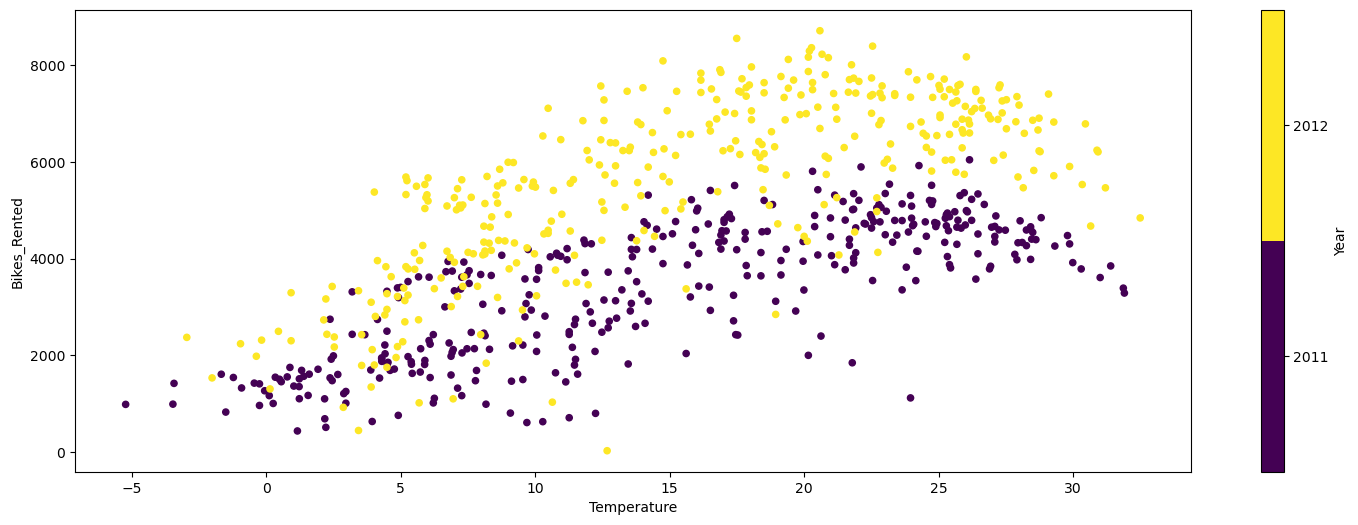

In [41]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Year').collect().astype({"Year": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Year', colormap='viridis')
)
plt.show()

In [42]:
weather_df=bikes_hdf.value_counts(['Weather']).collect().set_index('VALUES')
display(weather_df)

,NUM_Weather
VALUES,
MISTY,247
GOOD,463
RAIN/SNOW/STORM,21


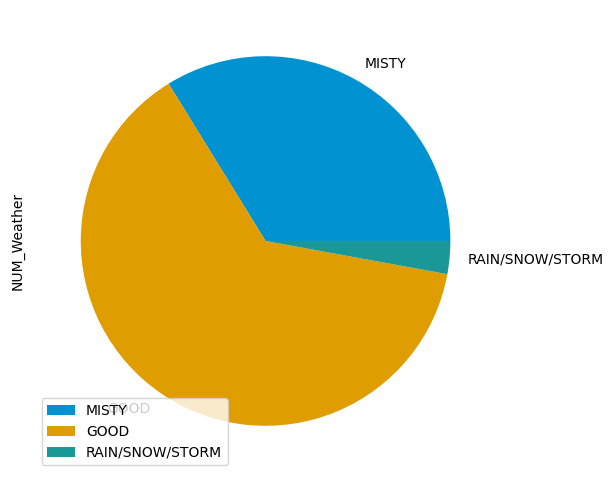

In [43]:
(weather_df
 .plot.pie(y = 'NUM_Weather')
)
plt.show()

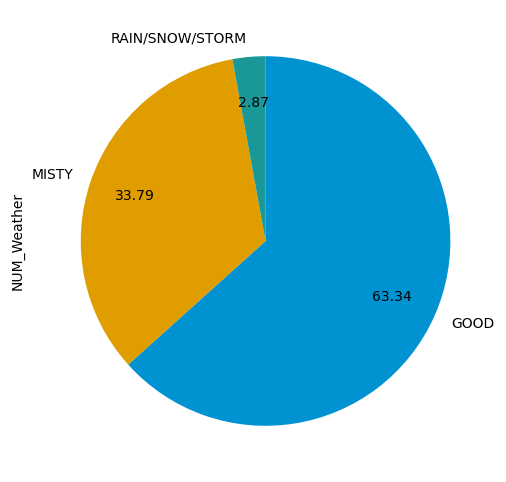

In [44]:
(weather_df
 .sort_values('NUM_Weather', ascending=False)
 .plot.pie(y = 'NUM_Weather', legend=False, 
        startangle=90, counterclock=False,
        autopct='%.2f', pctdistance=0.75)
)
plt.show()


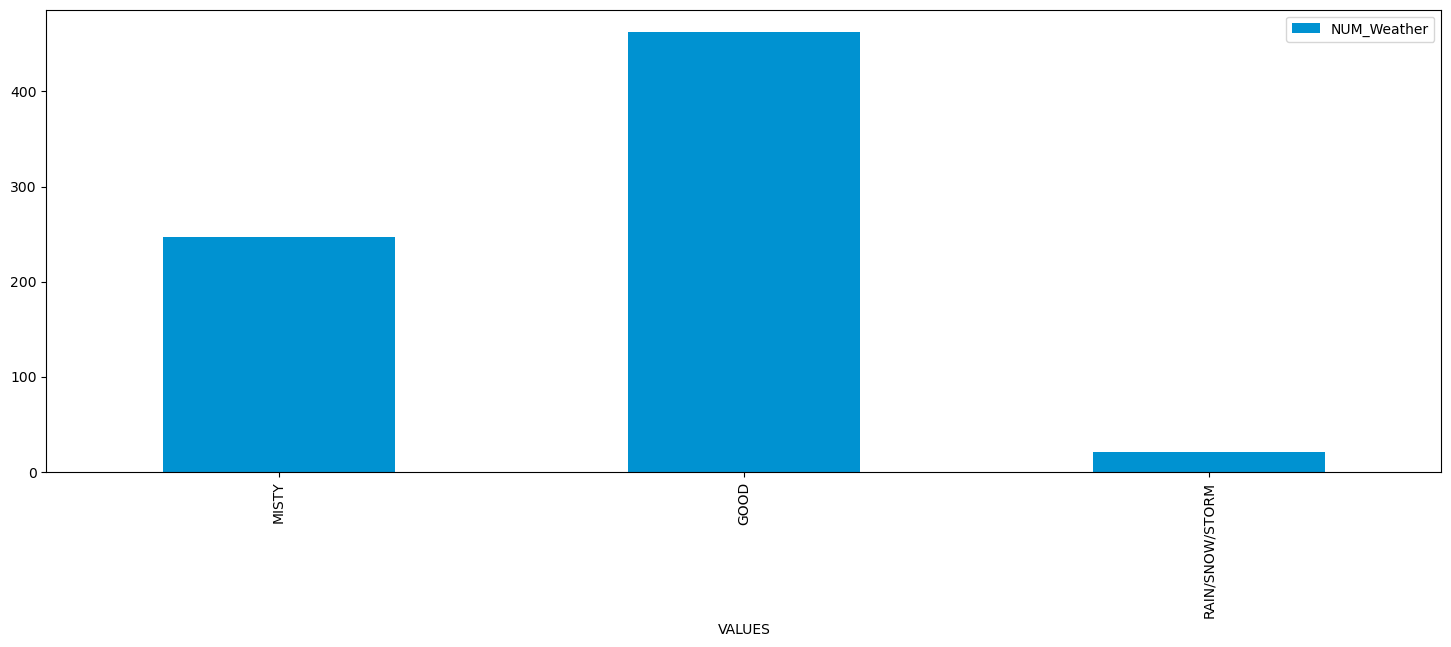

In [45]:
weather_df.plot.bar()
plt.show()

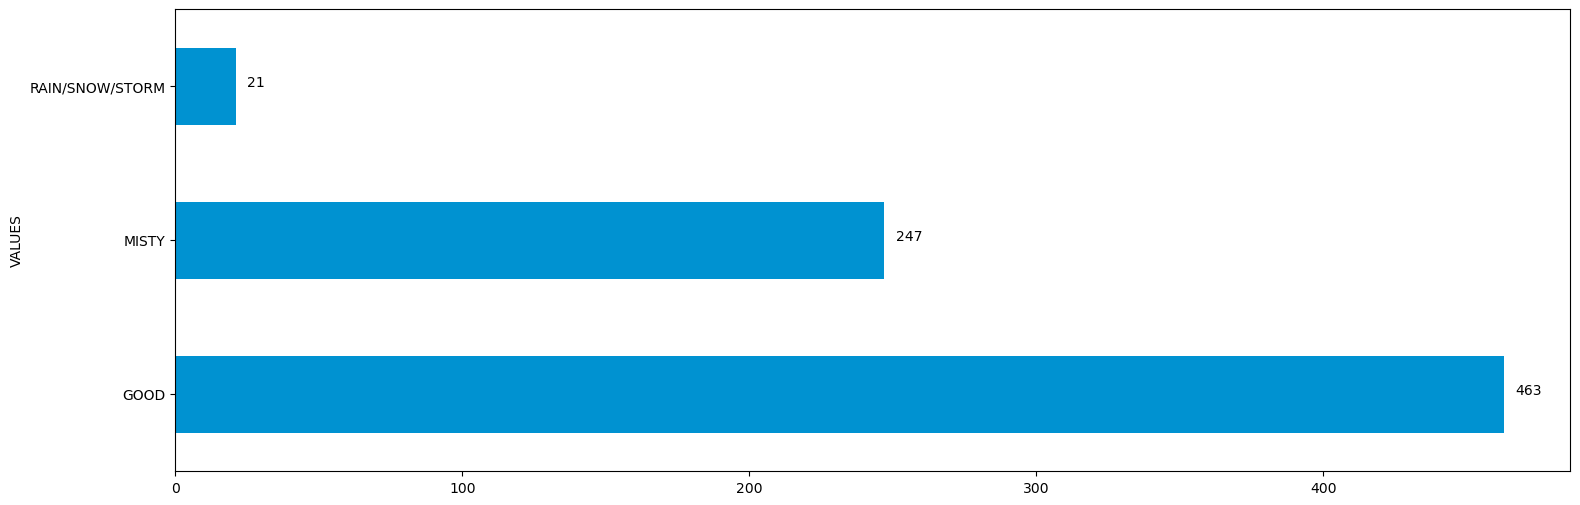

In [46]:
(weather_df
 .sort_values('NUM_Weather', ascending=False)
 .plot.barh(legend=False)
)

#Using text annotations to calculate positions and place values next to their corresponding bars
for i in range(len(weather_df)):
    plt.text(y = i, 
             x = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i]+4, # x position
             s = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i],   # text to display
             ha = 'left')
plt.show()

In [47]:
from hana_ml.visualizers.eda import EDAVisualizer

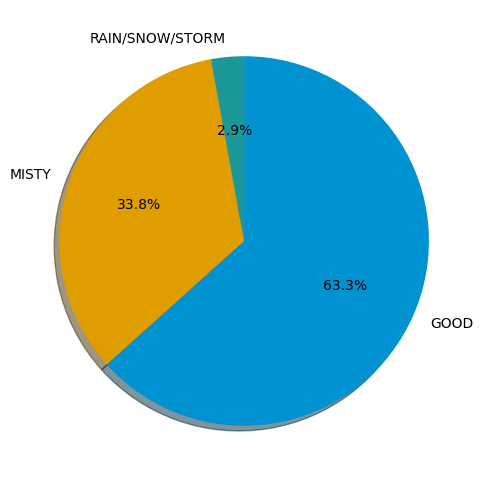

In [48]:
_, df = EDAVisualizer().pie_plot(data=bikes_hdf, column="Weather",
                                 legend=False, explode=0, 
                                 startangle=90, counterclock=False)
plt.show()

In [49]:
display(df)

,Weather,COUNT
0,GOOD,463
1,MISTY,247
2,RAIN/SNOW/STORM,21


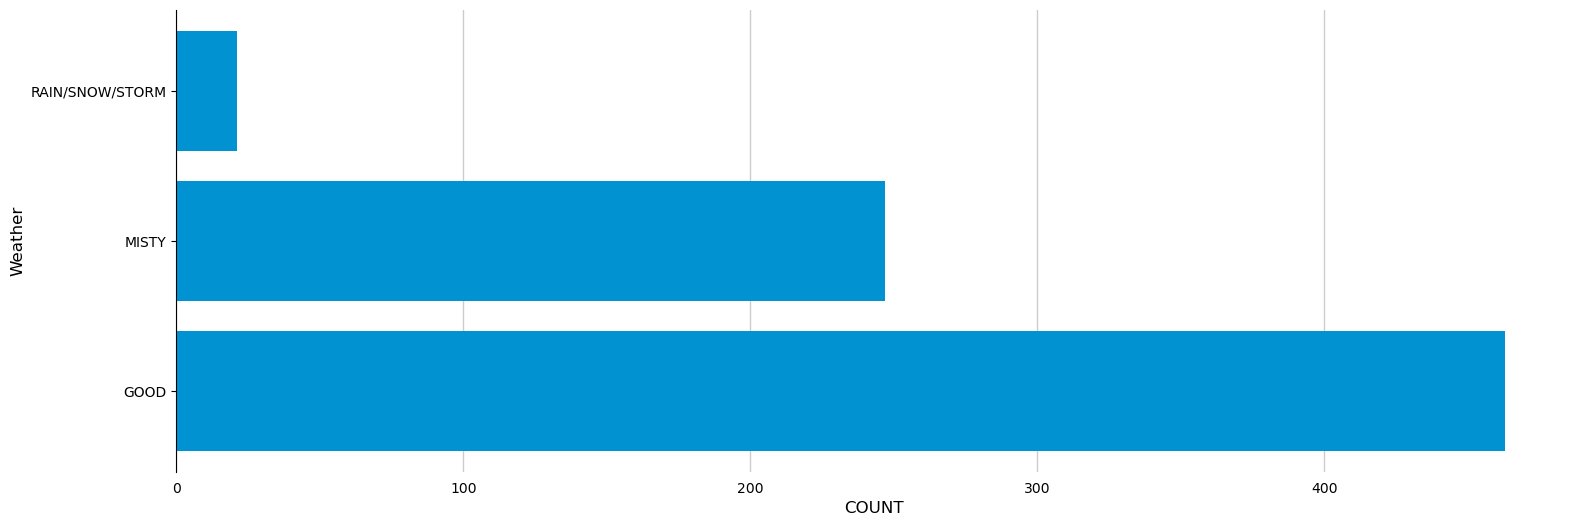

In [50]:
_, df = EDAVisualizer().bar_plot(data=bikes_hdf, column='Weather', aggregation={'Weather':'count'})
plt.show()

In [51]:
display(df)

,Weather,COUNT
0,GOOD,463
1,MISTY,247
2,RAIN/SNOW/STORM,21
